<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Transfer_Learining_01_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/2", input_shape=(224, 224, 3)), #input layer
    tf.keras.layers.Dense(units=1,
                          activation="sigmoid") # output layer
])

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
import zipfile

zip_dir = zipfile.ZipFile('/content/data.zip')
zip_dir.extractall()
zip_dir.close()

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
data = datagen.flow_from_directory(directory='/content/data',
                                   target_size=(224, 224),
                                   class_mode='binary',
                                   batch_size=32,
                                   shuffle=True)

Found 20 images belonging to 2 classes.


In [ ]:
import pathlib
dir = pathlib.Path('data')
classes = sorted(item.name for item in dir.glob("*"))
classes

['bicycle', 'bike']

In [ ]:
history = model.fit(data, epochs=5)

Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 0.5981 - accuracy: 0.7000
Epoch 2/5
1/1 [==============================] - 9s 9s/step - loss: 0.5371 - accuracy: 0.8500
Epoch 3/5
1/1 [==============================] - 8s 8s/step - loss: 0.4818 - accuracy: 0.9000
Epoch 4/5
1/1 [==============================] - 8s 8s/step - loss: 0.4318 - accuracy: 0.9500
Epoch 5/5
1/1 [==============================] - 8s 8s/step - loss: 0.3865 - accuracy: 0.9500


--2024-04-29 17:56:02--  https://as1.ftcdn.net/v2/jpg/03/52/21/48/1000_F_352214843_dQ3JtTJrKyqrh2yd1emYCDPSrzrwqaNK.jpg
Resolving as1.ftcdn.net (as1.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to as1.ftcdn.net (as1.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276066 (270K) [image/jpeg]
Saving to: ‘1000_F_352214843_dQ3JtTJrKyqrh2yd1emYCDPSrzrwqaNK.jpg.1’

1000_F_352214843_dQ 100%[===================>] 269.60K  --.-KB/s    in 0.01s   

2024-04-29 17:56:02 (19.3 MB/s) - ‘1000_F_352214843_dQ3JtTJrKyqrh2yd1emYCDPSrzrwqaNK.jpg.1’ saved [276066/276066]



(-0.5, 999.5, 561.5, -0.5)

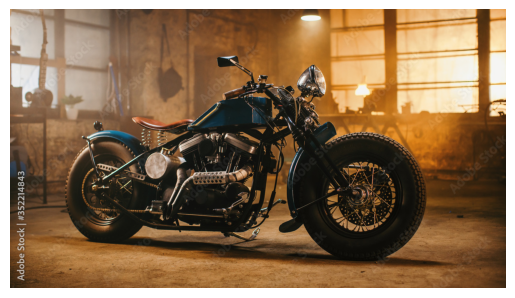

In [ ]:
!wget https://as1.ftcdn.net/v2/jpg/03/52/21/48/1000_F_352214843_dQ3JtTJrKyqrh2yd1emYCDPSrzrwqaNK.jpg
image = mimg.imread('1000_F_352214843_dQ3JtTJrKyqrh2yd1emYCDPSrzrwqaNK.jpg')
plt.imshow(image)
plt.axis(False)

In [ ]:
def pred_plot(model, filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[224, 224])
  img = img/255.

  pred = model.predict(tf.expand_dims(img, axis=0))

  plt.imshow(img)
  plt.title(classes[tf.squeeze(pred)>0.5])
  plt.axis(False)

1/1 [==============================] - 0s 55ms/step


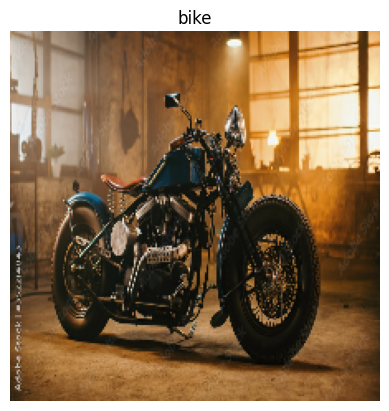

In [ ]:
pred_plot(model, '1000_F_352214843_dQ3JtTJrKyqrh2yd1emYCDPSrzrwqaNK.jpg')